## Import Modules

1. NumPy is the fundamental package for scientific computing in Python.
2. Pandas is a data science/data analysis package that is built on NumPy.
3. matplotlib.pyplot is a comprehensive package for creating visualizations in Python.

✅ **Import A as B**

* "Import A as B" means that we will call A package named B.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Categorical Data

After you import the packages, you can use many functions in the packages.

✅ **pandas.read_excel**

* To load the data of excel file, you have to use "read_excel" function in Pandas.
* "read_excel" function needs the file path, so you need to input the exact location of "AirSurvey.xlsx" file.
* https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

✅ **File Path**
* "./" means the location of current file. 
* For this reason, './AirSurvey.xlsx' means the location of excel file which is in the location of this jupyter notebook file.
* Finally, you can access the excel file in this notebook by putting them in the same place.

In [2]:
cat_data = pd.read_excel('./AirSurvey.xlsx') # ✅ pandas.read_excel ✅ File Path

DataFrame object is created because you assigned it to "cat_data" variable.

It provides many useful functions for tabular data.

✅ **pandas.DataFrame.head**

* When you use "head" function in pandas, it returns the first n rows of the excel data.
* Aside from head function, there are many functions in a DataFrame object.
* If you want to know more functions, you can obtain the information through below link.
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [3]:
cat_data.head(10) # ✅ pandas.DataFrame.head

,Rating
0,Excellent
1,Excellent
2,Very Good
3,Good
4,Excellent
5,Excellent
6,Good
7,Very Good
8,Excellent
9,Excellent


## 1-1. Frequency Distribution

✅ **pandas.DataFrame.value_counts**

* value_counts() is also a function of the DataFrame object.
* It returns the frequency of the data.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

In [4]:
# By wrapping with pandas.DataFrame, you can obtain DataFrame object.
cat_table = pd.DataFrame(cat_data["Rating"].value_counts()) # ✅ pandas.DataFrame.value_counts

# Rename the column as 'Frequency'
cat_table.columns = ['Frequency']

# Check the table
cat_table

,Frequency
Very Good,23
Excellent,20
Good,4
Poor,2
Fair,1


## 1-2. Relative Frequency Distribution

DataFrame object (excatly NumPy) offers flexible oprations that can help the array of numbers to operate with an integer.

Therefore, you can get the relative frequency by dividing "Frequency" column of the table with the sum of the frequency.

✅ **sum**

* sum() function is a python built-in function.
* It returns a total of the items contained in the iterable object.

In [5]:
# You can access the column of the table through the format like table["Column Name"].
total_num = sum(cat_table["Frequency"]) # ✅ sum

# New Column can be created when the assigned object has the same length of the table.
cat_table["Relative Frequency"] = cat_table["Frequency"] / total_num
cat_table

,Frequency,Relative Frequency
Very Good,23,0.46
Excellent,20,0.40
Good,4,0.08
Poor,2,0.04
Fair,1,0.02


## 1-2. Percent Frequency Distribution

The percent frequency distribution can also be obtained in the same way.

In [6]:
cat_table["Percent Frequency"] = cat_table["Relative Frequency"] * 100
cat_table

,Frequency,Relative Frequency,Percent Frequency
Very Good,23,0.46,46.0
Excellent,20,0.40,40.0
Good,4,0.08,8.0
Poor,2,0.04,4.0
Fair,1,0.02,2.0


## 1-3. Bar Chart

To make a Bar Chart, we will use a bar function of matplotlib.pyplot.

✅ **numpy.arange**
* This function returns evenly spaced values within a given interval.
* https://numpy.org/doc/stable/reference/generated/numpy.arange.html

✅ **len**
- len() function is a python built-in function.
- It returns the length (the number of items) of an object.

✅ **matplotlib.pyplot.bar**
- The x coordinates of the bars and the heights of the bars should be given.
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- If you want to know more functions in pyplot, you can obtain the information through below link.
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

In [7]:
categories = cat_table.index
categories

Index(['Very Good', 'Excellent', 'Good', 'Poor', 'Fair'], dtype='object')

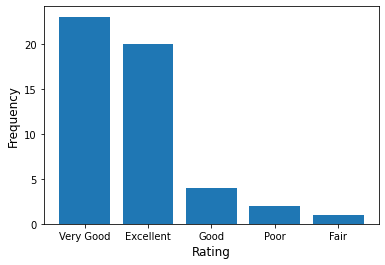

In [8]:
# len(cat_table) : the number of categories
# np.arange(len(cat_table)) : The x coordinates of the bars
x = np.arange(len(cat_table)) # ✅ numpy.arange ✅ len (0,1,2,3,4)

# The label for each category can be accessed by using DataFrame.index.values
categories = cat_table.index

# Make a bar plot with frequency
plt.bar(x, cat_table["Frequency"]) # ✅ matplotlib.pyplot.bar

# Set the labels of the x-axis.
plt.xticks(x, categories)

# Name X,Y axis
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show your figure
plt.show()

## 1-4. Pie Chart

Pie chart can also be created through matplotlib.pyplot.

✅ **matplotlib.pyplot.pie**
- This function makes a pie chart of array x.
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

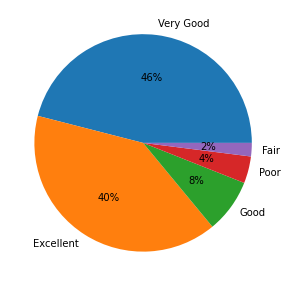

In [9]:
# Resize your Figure
plt.figure(figsize=(5, 5))

# Make a pie chart of relative Frequency
plt.pie(cat_table['Relative Frequency'], labels=categories, autopct='%.0f%%') # ✅ matplotlib.pyplot.pie

# Show your figure
plt.show()

# 2. Quantitative Data

In the same way as above, we first load quantitative data from "ApTest.xlsx" file.

In [10]:
quan_data = pd.read_excel('./ApTest.xlsx')
quan_data.head(10)

,Correct
0,112
1,73
2,126
3,82
4,92
5,115
6,95
7,84
8,68
9,100


The three steps necessary to define the class for frequency distribution with quantitative data are:
1. Determine the number of non-overlapping class
2. Determine the width of each class
3. Determine the class limits

### 1. Determine the number of non-overlapping class

The number of classes is set to 9.

In [11]:
class_num = 9

### 2. Determine the width of each class

✅ **max**
* max() function is a python built-in function.
* It returns the largest item in an iterable object.

✅ **min**
* min() function is a python built-in function.
* It returns the smallest item in an iterable object.

In [12]:
class_width = (max(quan_data.Correct) - min(quan_data.Correct)) / class_num # ✅ max ✅ min
class_width

8.11111111111111

### *Round this number up to make sense intuitively, so the class width is now set to 10.*

In [13]:
class_width = 10

### 3. Determine the class limits

- Lower limits for the 1st class is 60 and upper limits for the 1st class is 69.
- Lower limits for the 2nd 2nd is 70 and upper limits for the 2nd class is 79.
## ``````

- Lower limits for the last class is 140 and upper limits for the last class is 149.

✅ **range()**

* range() iterates over a sequence of numbers, so you can get the list of numbers by wrapping with list().
* https://docs.python.org/3.6/tutorial/controlflow.html#the-range-function


✅ **List Comprehension**

* With list comprehension you can create a new list based on the values of an existing list with only one line of code.
* https://www.geeksforgeeks.org/python-list-comprehension/

✅ **f-strings**

* f-strings let you include the value of Python expressions inside a string by prefixing the string with 'f' and writing expressions as {exp} 
* https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals


In [14]:
bins = list(range(60, 151, class_width)) # ✅ range()
labels = [f'{x}-{x+class_width-1}' for x in bins[:-1]] # ✅ List Comprehension ✅ f-strings

print('Limits for each class: ', labels)

Limits for each class:  ['60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149']


✅ **pandas.cut**

* This function is useful for segmenting data values into pre-specified array of bins.
* https://pandas.pydata.org/docs/reference/api/pandas.cut.html


In [15]:
quan_data['Class'] = pd.cut(quan_data["Correct"], bins, labels=labels, right=False) # ✅ pandas.cut()
quan_data.head(10)

,Correct,Class
0,112,110-119
1,73,70-79
2,126,120-129
3,82,80-89
4,92,90-99
5,115,110-119
6,95,90-99
7,84,80-89
8,68,60-69
9,100,100-109


## 2-1. Frequency Distribution

✅ **pandas.DataFrame.sort_index**

* This function returns a new DataFrame sorted by label.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html


In [16]:
# To make easy on the eye, sort the classes by using sort_index function.
quan_table = pd.DataFrame(quan_data.Class.value_counts()).sort_index() # ✅ pandas.DataFrame.sort_index
quan_table.columns = ['Frequency']
quan_table

,Frequency
60-69,2
70-79,6
80-89,8
90-99,11
100-109,9
110-119,7
120-129,4
130-139,2
140-149,1


## 2-2. Relative Frequency Distribution

In [17]:
total_num = sum(quan_table["Frequency"])
quan_table["Relative Frequency"] = quan_table["Frequency"] / total_num
quan_table

,Frequency,Relative Frequency
60-69,2,0.04
70-79,6,0.12
80-89,8,0.16
90-99,11,0.22
100-109,9,0.18
110-119,7,0.14
120-129,4,0.08
130-139,2,0.04
140-149,1,0.02


## 2-3. Percent Frequency Distribution

In [18]:
total_num = sum(quan_table["Frequency"])
quan_table["Percent Frequency"] = quan_table["Relative Frequency"] * 100
quan_table

,Frequency,Relative Frequency,Percent Frequency
60-69,2,0.04,4.0
70-79,6,0.12,12.0
80-89,8,0.16,16.0
90-99,11,0.22,22.0
100-109,9,0.18,18.0
110-119,7,0.14,14.0
120-129,4,0.08,8.0
130-139,2,0.04,4.0
140-149,1,0.02,2.0


## 2-4. Dot Plot

✅ **numpy.meshgrid**

* This function returns coordinate matrices from coordinate vectors.
* https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

✅ **pandas.DataFrame.reindex**

* This function helps to conform Series/DataFrame to new index with optional filling logic.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html

✅ **numpy.expand_dims**

* This function expands the shape of an array.
* https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

In [19]:
x = np.arange(min(quan_data.Correct), max(quan_data.Correct)+1)

# pandas.DataFrame.reindex function was used to handle unobserved values.
# ✅ pandas.DataFrame.reindex
freq = quan_data.Correct.value_counts().reindex(x, fill_value=0)

# To compare frequency with Y coordinate, the dimensions of them should be matched.
# ✅ numpy.expand_dims
freq = np.expand_dims(freq.values, axis=0)

y = np.arange(1,freq.max()+5)

# To make a dot plot, get all coordinates in x,y range by using numpy.meshgrid.
# ✅ numpy.meshgrid
X, Y = np.meshgrid(x,y)

✅ **matplotlib.pyplot.scatter**

* This function scatters data points.
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html


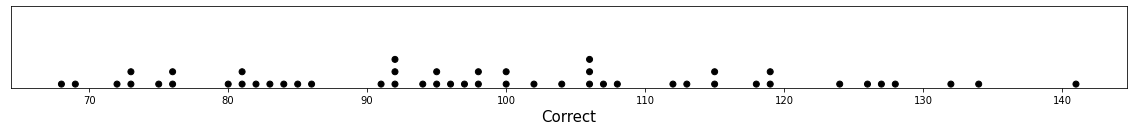

In [20]:
plt.figure(figsize=(20, 1.5))

# Do not plot when y coordinate is over the frequency of the corresponding value. 
# Therefore, it can show the frequency of the values.
plt.scatter(X,Y, c=Y<=freq, cmap="Greys") # ✅ matplotlib.pyplot.scatter

# Do not show the y-axis
plt.gca().axes.yaxis.set_visible(False)

plt.xlabel('Correct', fontsize=15)
plt.show()

In [21]:
quan_table

,Frequency,Relative Frequency,Percent Frequency
60-69,2,0.04,4.0
70-79,6,0.12,12.0
80-89,8,0.16,16.0
90-99,11,0.22,22.0
100-109,9,0.18,18.0
110-119,7,0.14,14.0
120-129,4,0.08,8.0
130-139,2,0.04,4.0
140-149,1,0.02,2.0


## 2-5. Histogram

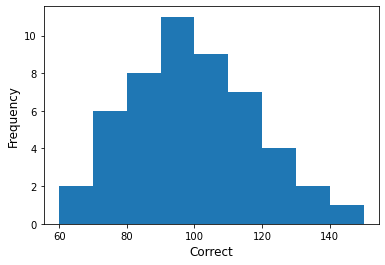

In [22]:
plt.hist(quan_data["Correct"], bins=bins)

plt.xlabel('Correct', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

## 2-6. Cumulative Frequency Distribution

✅ **pandas.DataFrame.cumsum**

* This function returns cumulative sum over a DataFrame.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html

✅ **pandas.DataFrame.rename**

* This function alters axes labels.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

In [23]:
cum_table = pd.DataFrame(quan_table["Frequency"].cumsum()) # ✅ pandas.DataFrame.cumsum
cum_table.rename(index=lambda x:'<='+x.split('-')[-1], inplace=True) # ✅ pandas.DataFrame.rename
cum_table.columns = ['Cumulative Frequency']
cum_table

,Cumulative Frequency
<=69,2
<=79,8
<=89,16
<=99,27
<=109,36
<=119,43
<=129,47
<=139,49
<=149,50


✅ **numpy.round**

* This function rounds an array to the given number of decimals.
* https://numpy.org/doc/stable/reference/generated/numpy.round_.html

In [24]:
total_num = sum(cum_table['Cumulative Frequency'])
cum_table["Cumulative Relative Frequency"] = np.round(cum_table['Cumulative Frequency'] / total_num, 2) # ✅ numpy.round
cum_table

,Cumulative Frequency,Cumulative Relative Frequency
<=69,2,0.01
<=79,8,0.03
<=89,16,0.06
<=99,27,0.10
<=109,36,0.13
<=119,43,0.15
<=129,47,0.17
<=139,49,0.18
<=149,50,0.18


In [25]:
cum_table["Cumulative Percent Frequency"] = cum_table["Cumulative Relative Frequency"] * 100
cum_table

,Cumulative Frequency,Cumulative Relative Frequency,Cumulative Percent Frequency
<=69,2,0.01,1.0
<=79,8,0.03,3.0
<=89,16,0.06,6.0
<=99,27,0.10,10.0
<=109,36,0.13,13.0
<=119,43,0.15,15.0
<=129,47,0.17,17.0
<=139,49,0.18,18.0
<=149,50,0.18,18.0


✅ **numpy.array**

* This function converts an object to a numpy array.
* https://numpy.org/doc/stable/reference/generated/numpy.array.html

✅ **matplotlib.pyplot.plot**

* This function plots y versus x as lines and/or markers.
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

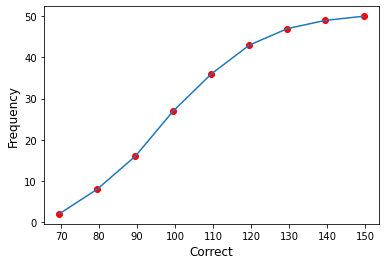

In [26]:
# To elminate the gaps between class limits, we need to plot points halfway between the class limits.
x = np.array(bins[1:]) - 0.5 # ✅ numpy.array

y = cum_table['Cumulative Frequency'].values

plt.xlabel('Correct', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# ✅ matplotlib.pyplot.plot
plt.plot(x,y, 'ro') # plot x and y using red circle markers
plt.plot(x,y) # plot x and y using default line style and color

plt.show()